In [24]:
import networkx as nx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
from IPython.display import Image
%matplotlib inline

### One way to obtain the OSM data is to input the geocode name as follows:

In [4]:
G = ox.graph_from_place("Salt Lake City, Utah, USA", network_type="drive")

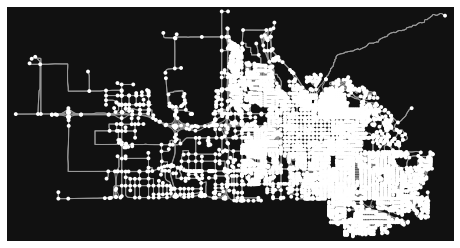

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph(G)

### Another way to retrive the osm map is to use bounding box
`osmnx.geometries.geometries_from_bbox(north, south, east, west, tags)`


In [6]:
G = ox.graph_from_bbox(40.82552,40.47752,-112.11874,-111.75276, network_type="drive")

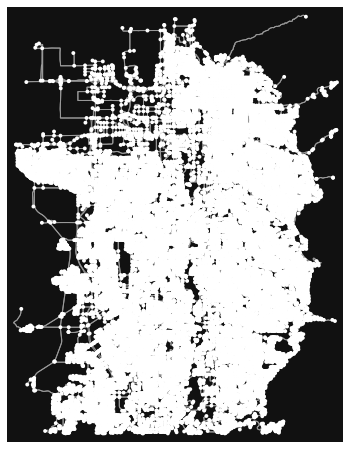

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [7]:
ox.plot_graph(G)

In [8]:
nodes, edges = ox.graph_to_gdfs(G)

In [9]:
nodes

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
83510174,40.687115,-112.003547,3,NaN,NaN,POINT (-112.00355 40.68712)
83510177,40.686822,-112.003537,1,turning_circle,NaN,POINT (-112.00354 40.68682)
83510183,40.629899,-111.957845,3,NaN,NaN,POINT (-111.95785 40.62990)
83510185,40.629886,-111.960791,3,NaN,NaN,POINT (-111.96079 40.62989)
83510196,40.685012,-112.027552,3,NaN,NaN,POINT (-112.02755 40.68501)
...,...,...,...,...,...,...
9271266821,40.567452,-112.010558,3,NaN,NaN,POINT (-112.01056 40.56745)
9271266863,40.567704,-112.010917,3,NaN,NaN,POINT (-112.01092 40.56770)
9271293854,40.566316,-112.008466,3,NaN,NaN,POINT (-112.00847 40.56632)


In [10]:
edges_df = pd.DataFrame(edges).reset_index(level=[0,1])
edges_df.head()

,u,v,osmid,name,highway,oneway,length,geometry,lanes,maxspeed,ref,bridge,access,junction,tunnel,width
key,,,,,,,,,,,,,,,,
0,83510174,83510177,10124561,Kallie Circle,residential,False,32.569,"LINESTRING (-112.00355 40.68712, -112.00354 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,83510174,83603728,10137704,Kathleen Avenue,residential,False,93.337,"LINESTRING (-112.00355 40.68712, -112.00244 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,83510174,83554055,"[10137704, 10132317]","[Kathleen Avenue, 4755 West]",residential,False,199.320,"LINESTRING (-112.00355 40.68712, -112.00457 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,83510177,83510174,10124561,Kallie Circle,residential,False,32.569,"LINESTRING (-112.00354 40.68682, -112.00355 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,83510183,83578430,801708526,Constitution Boulevard,secondary,False,175.592,"LINESTRING (-111.95785 40.62990, -111.95783 40...",2,40 mph,NaN,NaN,NaN,NaN,NaN,NaN


### GWS84 ---> cartesian coordinate system

In [12]:
p = Proj(proj="utm", zone=12, ellps="WGS84", preserve_units=False)

In [13]:
nodes['plain_x'],nodes['plain_y']=p(nodes['x'],nodes['y'])

In [14]:
nodes

,y,x,street_count,highway,ref,geometry,plain_x,plain_y
osmid,,,,,,,,
83510174,40.687115,-112.003547,3,NaN,NaN,POINT (-112.00355 40.68712),415201.639906,4.504509e+06
83510177,40.686822,-112.003537,1,turning_circle,NaN,POINT (-112.00354 40.68682),415202.130637,4.504476e+06
83510183,40.629899,-111.957845,3,NaN,NaN,POINT (-111.95785 40.62990),418994.273861,4.498115e+06
83510185,40.629886,-111.960791,3,NaN,NaN,POINT (-111.96079 40.62989),418745.150950,4.498116e+06
83510196,40.685012,-112.027552,3,NaN,NaN,POINT (-112.02755 40.68501),413170.479391,4.504299e+06
...,...,...,...,...,...,...,...,...
9271266821,40.567452,-112.010558,3,NaN,NaN,POINT (-112.01056 40.56745),414456.644692,4.491233e+06
9271266863,40.567704,-112.010917,3,NaN,NaN,POINT (-112.01092 40.56770),414426.575871,4.491261e+06
9271293854,40.566316,-112.008466,3,NaN,NaN,POINT (-112.00847 40.56632),414632.282135,4.491104e+06


In [15]:
with open("template_network4.xml",'w') as f:
    f.write('<?xml version="1.0" encoding="utf-8"?>\n')
    f.write('<!DOCTYPE network SYSTEM "http://www.matsim.org/files/dtd/network_v1.dtd">\n')
    f.write('<network name="equil test network">\n')
    f.write('\t<nodes>\n')
    for ID,x,y in zip(nodes.index,nodes['plain_x'],nodes['plain_y']):

        f.write(f'<node id="{ID}" x="{x}" y="{y}"/>\n')
    f.write('\t</nodes>\n')
    f.write('\t<links>\n')
    for ID,u,v,l in zip(range(len(edges_df)),edges_df['u'],edges_df['v'],edges_df['length']):
        f.write(f'\t<link id="{ID}" from="{u}" to="{v}" length="{l}" capacity="36000" freespeed="27.78" permlanes="1"/>\n')
    f.write('\t</links>\n')
    f.write('</network>')

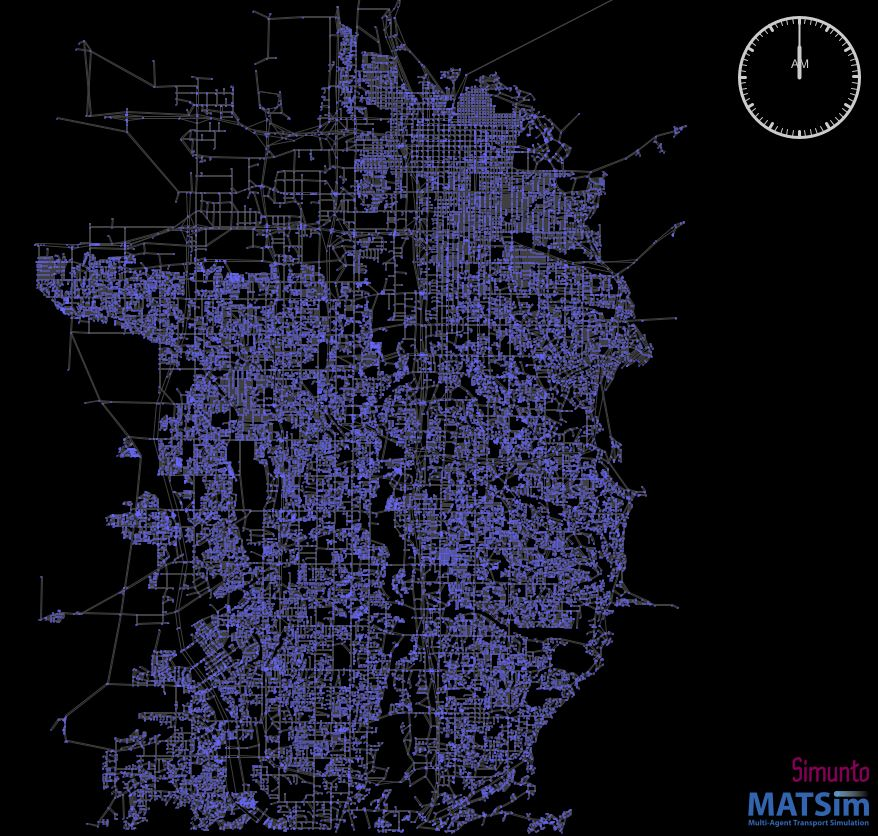

In [25]:
Image("C:/Users/Zhiyan/Desktop/res.jpg")

unknown values:
1. free_flow
2. capacity
3. num of lanes